<a href="https://colab.research.google.com/github/GeunheeHan/2020-2-AI/blob/main/06_neuron_activation_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

자연수와 자연수의 지수 승

In [3]:
import tensorflow as tf
import numpy as np
np.e

2.718281828459045

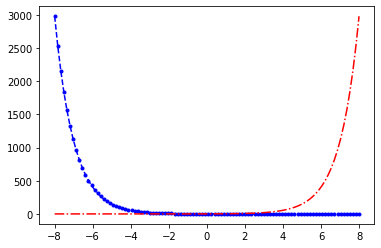

In [4]:
import numpy as np
import matplotlib.pylab as plt 

plt.figure(figsize=(6, 4))
x= np.linspace(-8,8,100)
plt.plot(x,np.exp(-x), 'b--.')
_=plt.plot(x,np.exp(x), 'r-.')

In [5]:
np.e


2.718281828459045

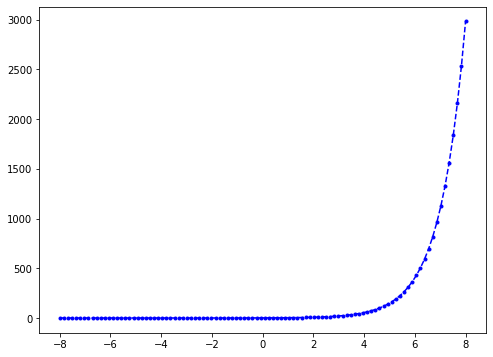

In [7]:
#S자 곡선 sigmod 함수

import numpy as np
import matplotlib.pylab as pl 

def sigm_func(x):#sigmoid 
  return 1/(1 + np.exp(-x))
plt.figure(figsize=(8, 6))
x= np.linspace(-8,8,100)
plt.plot(x,np.exp(x), 'b--.')

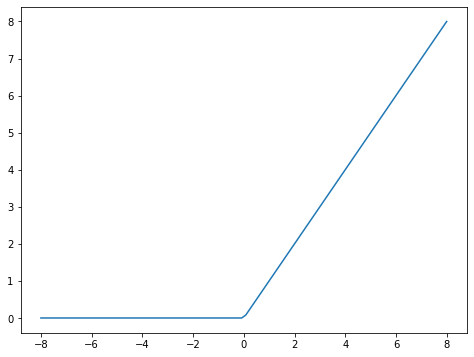

In [10]:

import numpy as np
import matplotlib.pylab as pl #pylab을 pyplot을 대체 가능

def relu_func(x):#sigmoid 
  return np.maximum(0,x)
  
plt.figure(figsize=(8, 6))
x= np.linspace(-8,8,100)
plt.plot(x, relu_func(x))



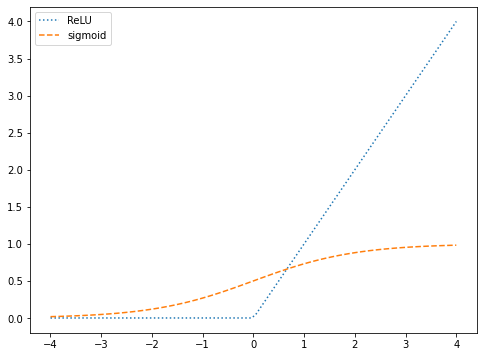

In [11]:

import numpy as np
import matplotlib.pylab as pl #pylab을 pyplot을 대체 가능

def relu_func(x):
  return np.maximum(0,x)
  
def sigm_func(x):
  return 1/(1 + np.exp(-x))

plt.figure(figsize=(8, 6))
x=np.linspace(-4,4,100)
y=np.linspace(-0.2,2,100)

plt.plot(x, relu_func(x), linestyle=':', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

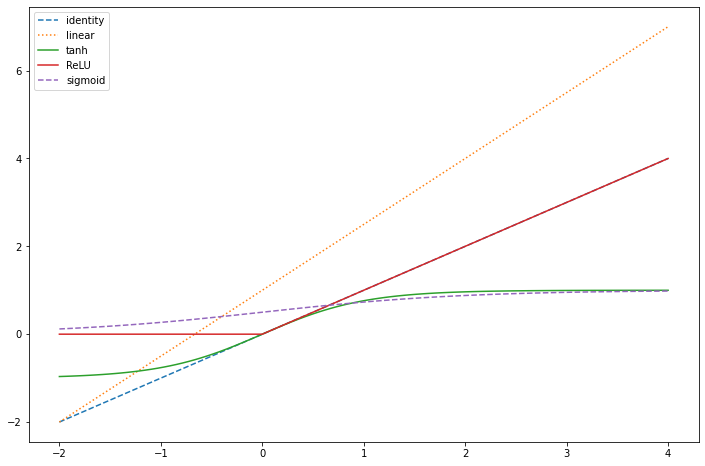

In [12]:
import numpy as np
import matplotlib.pylab as pl 

def identity_func(x): 
  return x

def linear_func(x): 
  return 1.5*x+1 

def tanh_func(x): 
  return np.tanh(x)


def relu_func(x):
  return np.maximum(0,x)
  
def sigm_func(x):
  return 1/(1 + np.exp(-x))

plt.figure(figsize=(12,8))
x=np.linspace(-2,4,100)

plt.plot(x, identity_func(x), linestyle='--', label="identity")
plt.plot(x, linear_func(x), linestyle=':', label="linear")
plt.plot(x, tanh_func(x), linestyle='-', label="tanh")
plt.plot(x, relu_func(x), linestyle='-', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')






인공 신경망 행렬 연산 코드(매우 중요)

In [13]:
x=[[1,2]]
w=[[1,2,3],[4,5,6]]

y= tf.matmul(x,w)
y.numpy()

array([[ 9, 12, 15]], dtype=int32)

In [14]:
x=[[6,5],[4,7],[5,6],[6,7]]
w=[[1,2,3],[4,5,6]]

y= tf.matmul(x,w)
y.numpy()


array([[26, 37, 48],
       [32, 43, 54],
       [29, 40, 51],
       [34, 47, 60]], dtype=int32)

In [15]:
w=[[1,4],[2,5],[3,6]]
x=[[6,4,5,6],[5,7,6,7]]

y= tf.matmul(w,x)
y.numpy()

array([[26, 32, 29, 34],
       [37, 43, 40, 47],
       [48, 54, 51, 60]], dtype=int32)

AND 게이트 구현 

In [17]:
#tf.keras를 이용한 AND 네트워크 계산
import numpy as np

x=np.array([[1,1],[1,0],[0,1],[0,0]])
y= np.array([[1],[0],[0],[0]])

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1,activation='sigmoid',input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')                                             
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x,y,epochs=400, batch_size=1)

Epoch 1/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 2/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2845
Epoch 3/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2776
Epoch 4/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2718
Epoch 5/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2669
Epoch 6/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 7/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2582
Epoch 8/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 9/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 10/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2465
Epoch 11/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2430
Epoch 12/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2395
Epoch 13/400
4/4 [==============================] - 0s 1ms/st

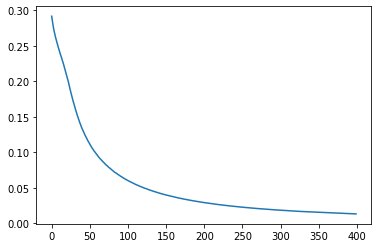

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [21]:
model.predict(x)

array([[0.8529418 ],
       [0.12412497],
       [0.12409714],
       [0.00344977]], dtype=float32)

In [22]:

for weight in model.weights:
  print(weight)

<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.7120535],
       [3.7117977]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-5.665988], dtype=float32)>


In [23]:
model.weights[0]

<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.7120535],
       [3.7117977]], dtype=float32)>

In [24]:
model.weights[1]

<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-5.665988], dtype=float32)>

In [25]:

import numpy as np

x=np.array([[1,1],[1,0],[0,1],[0,0]])
y= np.array([[1],[1],[1],[0]]) 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1,activation='sigmoid',input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

history = model.fit(x,y,epochs=400, batch_size=1)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1919
Epoch 2/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1710
Epoch 3/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1571
Epoch 4/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1471
Epoch 5/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1401
Epoch 6/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1346
Epoch 7/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 8/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1257
Epoch 9/400
4/4 [=============

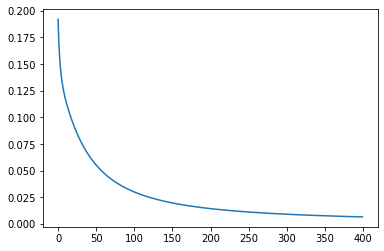

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [27]:
model.predict(x)

array([[0.9990932 ],
       [0.92530704],
       [0.9250903 ],
       [0.12192452]], dtype=float32)

In [28]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[4.49107  ],
       [4.4879384]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-1.97433], dtype=float32)>


In [30]:

x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape(2,)), 
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

SyntaxError: ignored

In [32]:
import tensorflow as tf
import numpy as np

x= np.array([[1,1],[1,0],[0,1],[0,0]])
y= np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3),loss='mse')
model.summary()

history = model.fit(x,y,epochs=2000, batch_size=1)

print(model.predict(x))

for weight in model.weights:
  print(weight)

SyntaxError: ignored